## Data Cleaning, imputation, transformation of loan data using machine learning concepts  

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loan = pd.read_csv("loan_data_set.csv")
loan.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [18]:
loan.info()
loan.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df = pd.DataFrame(loan)

In [21]:
df.drop('Loan_ID', axis=1, inplace=True)# Dropping Loan ID column 

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Transformation using SimpleImputer for columns containing null values

In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# defining variables for categorical and numerical data types with null values
categorical_cols = ['Gender','Married', 'Dependents','Self_Employed','Credit_History']
numerical_cols = ['LoanAmount', 'Loan_Amount_Term']

categorical_Imp = SimpleImputer(strategy = 'most_frequent')
df[categorical_cols] = categorical_Imp.fit_transform(df[categorical_cols])

numerical_Imp = SimpleImputer(strategy = 'median')
df[numerical_cols] = numerical_Imp.fit_transform(df[numerical_cols])


In [24]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
df.head(35)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Encoding the categorical values using Label Encoder 

In [11]:
# We can transform all the categorical data types present in our dataset into encoded vales by defining a list and looping through each column defined 
# in the list by the Name using the LabelEncoder function and fit_transform method but right now we dont want to change the all data fields into encoded
# values for our analysis so we are only transforming the dependent column as it contains 3 different values and one of which is an unconventional entry
# ("3+") a mixture of numerical character '3' and a non-numerical symbol('+').
 
#from sklearn.preprocessing import LabelEncoder
#import pandas as pd

#transform_data = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
#lab_enc = LabelEncoder()
#for i in transform_data:
    #df[i] = lab_enc.fit_transform(df[i])
#df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,i
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,Y,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y,2


In [31]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

labelencoder = LabelEncoder() # Initialize the LabelEncoder
df['Dep_encoded'] = labelencoder.fit_transform(df['Dependents']) # using fit_transform to learn different categories available in the column
#print(df['Dep_encoded'].to_string(index=False)) # setting index=False to remove the index label and printing the new new column with encoded values
df['Dependents'] = df['Dep_encoded']
df.drop('Dep_encoded', axis =1, inplace=True)
df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [32]:
df['Dependents'].count()

614

In [33]:
df['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

## Plotting the data to verify whether having dependents can impact getting loan approvals or not 

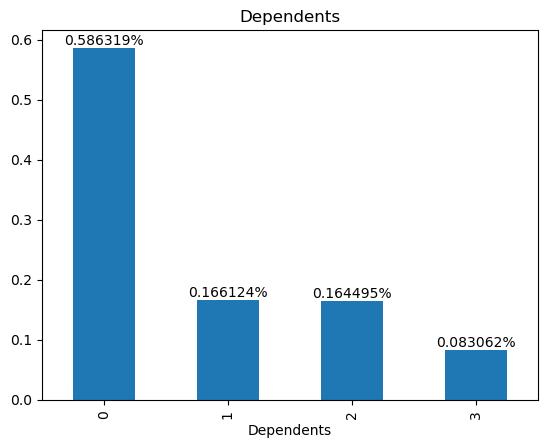

In [39]:
label = df['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')# normalize = True converts the count of each unique value to proportions(dividing each value by the total number of entries)
label.bar_label(label.containers[0],fmt='%1f%%')
plt.show()

#### So observing the bar plot we can simply understand that 58% of people have 0 dependent whereas, 17% of people have 1 or 2 dependents showing us equal distribution between them and only 8% of people have 3 or more dependents.

In [40]:
df.groupby('Dependents')['Loan_Status'].value_counts()

Dependents  Loan_Status
0           Y              247
            N              113
1           Y               66
            N               36
2           Y               76
            N               25
3           Y               33
            N               18
Name: count, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

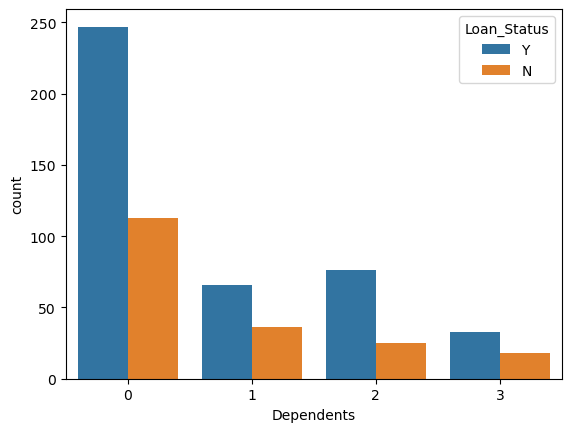

In [42]:
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

By analyzing the above plotted countplot we can observe that approximately 238 applicant with '0' dependents have got approval for their loan application and around 107 applicant with '0' dependents got their application rejected. The trend then just goes on decreasing with less number of applicant getting loan approvals as applicant with '1' dependent, 66 were approved and 36 were rejecte. Similarly, 76 applicants who applied for loan and got approval had '2' dependents whereas, 25 applicant got their application refused. Lastly, the applicants with 3 or more dependents had the fewest approvals (33) and a lower number of rejections (18).

## Conclusion
1) Following our research we can conclude that having no dependents does impact in processing loan application and getting approvals. The declining nature of the countplot proves our hypothesis about loan approvals based on number of dependents by each applicant.
2) We can also see that there is an equal distribution for loan status across both categories for applicant with 1 or 3+ dependents.